In [15]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
banks = []
alis = []
satis = []
url = "https://kur.doviz.com/serbest-piyasa/sterlin"
content = requests.get(url).content
content_parsed = bs(content,'html.parser')
for i in range(0,25,3):
    banks.append(content_parsed.findAll('td')[i].text)
    alis.append(content_parsed.findAll('td')[i+1].text)
    satis.append(content_parsed.findAll('td')[i+2].text)
    
df = pd.DataFrame({'Banka':banks,'Alış':alis,'Satış':satis})
df["Alış"] =  df["Alış"].str.replace(',', ".").astype(float)
df["Satış"] =  df["Satış"].str.replace(',', ".").astype(float)
df

,Banka,Alış,Satış
0,Akbank,7.6261,7.6300
1,Denizbank,7.3188,7.8941
2,QNB Finansbank,7.3172,7.9287
3,HSBC,7.6020,7.6231
4,İş Bankası,7.5970,7.6579
5,Merkez Bankası,7.5923,7.6319
6,Şekerbank,7.5939,7.6393
7,Vakıfbank,7.6033,7.6613
8,Yapıkredi,7.5880,7.6456


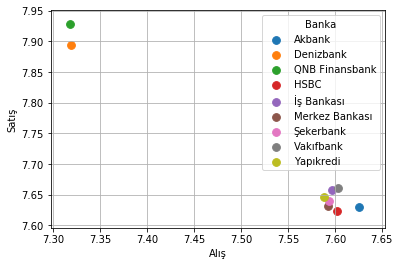

In [16]:
import matplotlib.pyplot as plt
fix, ax = plt.subplots()
color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
for i in range(len(df)):
    ax.scatter(df["Alış"][i],df["Satış"][i],c=color[i],s=60,label=df['Banka'][i])
ax.legend(title="Banka")
ax.grid(True)
plt.xlabel("Alış")
plt.ylabel("Satış")
plt.show()
# color